In [16]:
# mnist数据源
# Sequential类，可以封装各种神经网络层，包括Dense全连接层，Dropout层，Cov2D 卷积层等
# keras后端TensorFlow

from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

from keras.callbacks import Callback
import numpy as np


from matplotlib import pyplot as plt
from IPython import display
%matplotlib inline
display.set_matplotlib_formats('svg')
# import matplotlib.pyplot as plt

# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Dropout
# from keras.utils import np_utils



batch_size = 128
num_classes = 10
epochs = 10
lr=0.1

img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 

if K.image_data_format() == 'channels_first':
 x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
 x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
 input_shape = (1, img_rows, img_cols)
else:
 x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
 x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
 input_shape = (img_rows, img_cols, 1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# Sequential class
model = Sequential()
 
model.add(Conv2D(32, (5,5), activation='relu', input_shape=input_shape, strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5,5), activation='relu', strides=(1, 1), padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


opt = tf.keras.optimizers.SGD(learning_rate=lr)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
 verbose=1, validation_data=(x_test, y_test))


score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 63s 135ms/step - loss: 0.2891 - accuracy: 0.9135 - val_loss: 0.0785 - val_accuracy: 0.9751
Epoch 2/10
469/469 [==============================] - 64s 136ms/step - loss: 0.0695 - accuracy: 0.9786 - val_loss: 0.0495 - val_accuracy: 0.9845
Epoch 3/10
469/469 [==============================] - 64s 136ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.0500 - val_accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 64s 136ms/step - loss: 0.0378 - accuracy: 0.9884 - val_loss: 0.0393 - val_accuracy: 0.9873
Epoch 5/10
469/469 [==============================] - 64s 136ms/step - loss: 0.0311 - accuracy: 0.9903 - val_loss: 0.0320 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 63s 135ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0382 - val_accuracy: 0.9875
Epoch 7/10
469/469 [==============================] - 68s

In [17]:
def visual(history):
  fig = plt.figure()#新建一张图
  plt.plot(history.history['loss'],label='loss')
  plt.plot(history.history['accuracy'],label='training acc')
  plt.plot(history.history['val_accuracy'],label='val acc')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  
  plt.legend()
  plt.show()

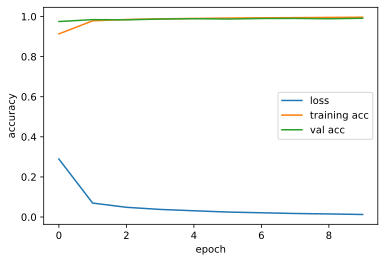

In [18]:
visual(history)

In [19]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_21 (Dense)             (None, 10)              